# Chapter 03 
 Machine Learning for Business Analytics<br>
Concepts, Techniques, and Applications in Python<br>
by Galit Shmueli, Peter C. Bruce, Peter Gedeck, Nitin R. Patel

Publisher: Wiley; 2nd edition (2024) <br>
<!-- ISBN-13: 978-3031075650 -->

(c) 2024 Galit Shmueli, Peter C. Bruce, Peter Gedeck, Nitin R. Patel

The code needs to be executed in sequence.

Python packages and Python itself change over time. This can cause warnings or errors.
"Warnings" are for information only and can usually be ignored.
"Errors" will stop execution and need to be fixed in order to get results.

If you come across an issue with the code, please follow these steps

- Check the repository (https://gedeck.github.io/sdsa-code-solutions/) to see if the code has been upgraded. This might solve the problem.
- Report the problem using the issue tracker at https://github.com/gedeck/sdsa-code-solutions/issues
- Paste the error message into Google and see if someone else already found a solution

**Code cell outcome:** Installs required packages (`mlba`, `adjustText`) and imports libraries for data manipulation and visualization.

In [1]:
import calendar
import os
!pip install mlba adjustText
import matplotlib.pyplot as plt
import mlba
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
from adjustText import adjust_text
from pandas.plotting import parallel_coordinates, scatter_matrix
from sklearn import preprocessing
%matplotlib inline

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


**Code cell outcome:** Loads the Boston housing dataset and renames the `CAT. MEDV` column to `CAT_MEDV` for easier handling; displays the first 9 rows.

In [2]:
housing_df = mlba.load_data('BostonHousing.csv')
# rename CAT. MEDV column for easier data handling
housing_df = housing_df.rename(columns={'CAT. MEDV': 'CAT_MEDV'})
housing_df.head(9)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7,0
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9,0
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15,27.1,0
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93,16.5,0


**Code cell outcome:** Loads and prepares the Amtrak ridership time series (converts dates, creates a Series) and reloads the Boston housing data for later use.

In [3]:
## Load the Amtrak data and convert them to be suitable for time series analysis
Amtrak_df = mlba.load_data('Amtrak.csv')
Amtrak_df['Date'] = pd.to_datetime(Amtrak_df.Month, format='%d/%m/%Y')
ridership_ts = pd.Series(Amtrak_df.Ridership.values, index=Amtrak_df.Date)

## Boston housing data
housing_df = mlba.load_data('BostonHousing.csv')
housing_df = housing_df.rename(columns={'CAT. MEDV': 'CAT_MEDV'})

 Pandas version

**Code cell outcome:** Creates a line chart of monthly Amtrak ridership from 1991 to 2004 using pandas plotting.

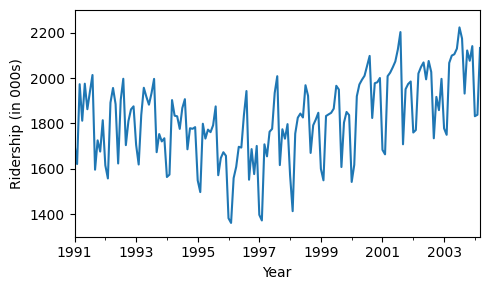

In [4]:
## line graph
ax = ridership_ts.plot(ylim=[1300, 2300], legend=False, figsize=[5, 3])
ax.set_xlabel('Year')  # set x-axis label
ax.set_ylabel('Ridership (in 000s)')  # set y-axis label
plt.tight_layout()
plt.show()

**Code cell outcome:** Generates a scatter plot of LSTAT vs MEDV, and two bar charts showing average MEDV and percentage of high-value homes by Charles River proximity (CHAS).

Text(0, 0.5, '% of CAT_MEDV')

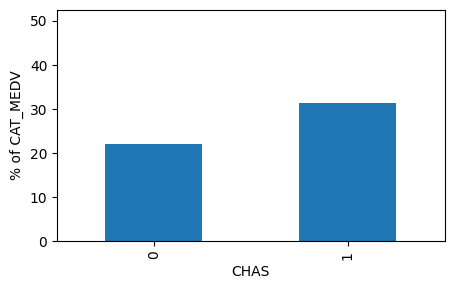

In [5]:
## scatter plot with axes names
housing_df.plot.scatter(x='LSTAT', y='MEDV', legend=False, figsize=[5, 3])

## barchart of CHAS vs. mean MEDV
# compute mean MEDV per CHAS = (0, 1)
ax = housing_df.groupby('CHAS').mean().MEDV.plot(kind='bar')
ax.set_ylabel('Avg. MEDV')

## barchart of CHAS vs. CAT_MEDV
dataForPlot = housing_df.groupby('CHAS').mean()['CAT_MEDV'] * 100
ax = dataForPlot.plot(kind='bar', figsize=[5, 3])
ax.set_ylabel('% of CAT_MEDV')

 matplotlib version

**Code cell outcome:** Plots the same Amtrak ridership time series using matplotlib.

Text(0, 0.5, 'Ridership (in 000s)')

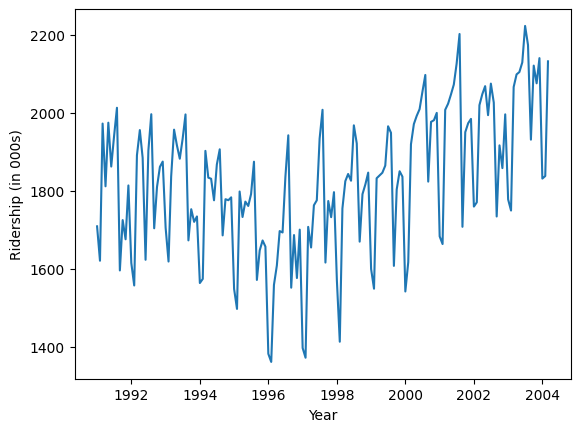

In [6]:
## line graph
plt.plot(ridership_ts.index, ridership_ts)
plt.xlabel('Year')  # set x-axis label
plt.ylabel('Ridership (in 000s)')  # set y-axis label

**Code cell outcome:** Creates a scatter plot of LSTAT vs MEDV with open circles using matplotlib.

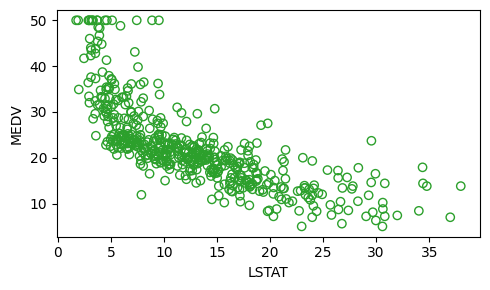

In [7]:
## Set the color of the points in the scatterplot and draw as open circles.
fig, ax = plt.subplots(figsize=[5, 3])
ax.scatter(housing_df.LSTAT, housing_df.MEDV, color='C2', facecolor='none')
plt.xlabel('LSTAT'); plt.ylabel('MEDV')
plt.tight_layout()
plt.show()

**Code cell outcome:** Bar chart of average MEDV for tracts near (CHAS=1) and not near (CHAS=0) the Charles River, using matplotlib.

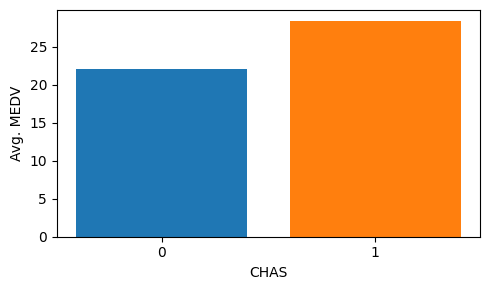

In [8]:
## barchart of CHAS vs. mean MEDV
# compute mean MEDV per CHAS = (0, 1)
dataForPlot = housing_df.groupby('CHAS').mean().MEDV
fig, ax = plt.subplots(figsize=[5, 3])
ax.bar(dataForPlot.index, dataForPlot, color=['C0', 'C1'])
ax.set_xticks([0, 1], minor=False)
ax.set_xlabel('CHAS')
ax.set_ylabel('Avg. MEDV')
plt.tight_layout()
plt.show()

**Code cell outcome:** Bar chart showing the percentage of high-value homes (CAT_MEDV) by CHAS, using matplotlib.

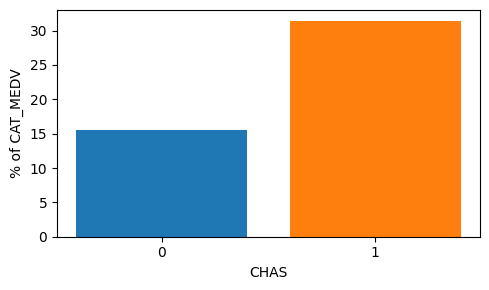

In [9]:
## barchart of CHAS vs. CAT_MEDV
dataForPlot = housing_df.groupby('CHAS').mean()['CAT_MEDV'] * 100
fig, ax = plt.subplots(figsize=[5, 3])
ax.bar(dataForPlot.index, dataForPlot, color=['C0', 'C1'])
ax.set_xticks([0, 1], minor=False)
ax.set_xlabel('CHAS'); ax.set_ylabel('% of CAT_MEDV')
plt.tight_layout()
plt.show()

**Code cell outcome:** Histogram of median home values (MEDV) using pandas.

Text(0, 0.5, 'Count')

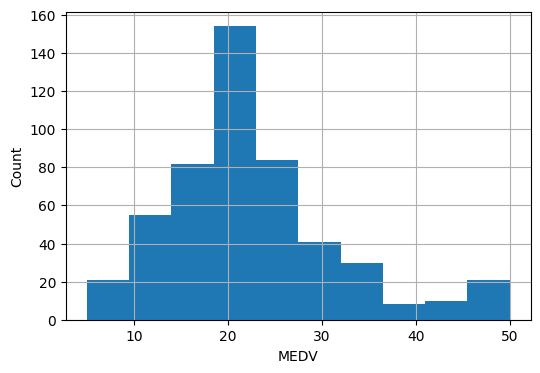

In [10]:
## histogram of MEDV
ax = housing_df.MEDV.hist(figsize=[6, 4])
ax.set_xlabel('MEDV'); ax.set_ylabel('Count')

**Code cell outcome:** Histogram of MEDV with grid lines using matplotlib.

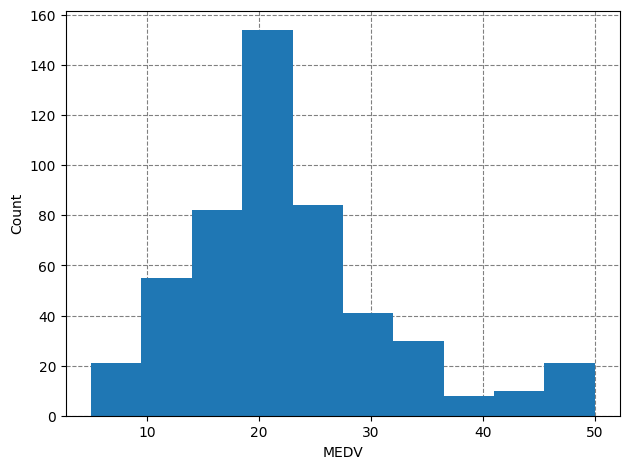

In [11]:
# alternative plot with matplotlib
fig, ax = plt.subplots()
ax.hist(housing_df.MEDV)
ax.set_axisbelow(True)  # Show the grid lines behind the histogram
ax.grid(which='major', color='grey', linestyle='--')
ax.set_xlabel('MEDV'); ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

**Code cell outcome:** Boxplots comparing the distribution of MEDV for CHAS=0 and CHAS=1 using pandas.

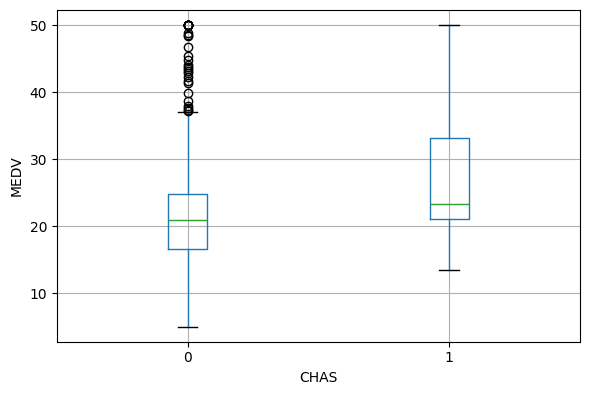

In [12]:
## boxplot of MEDV for different values of CHAS
ax = housing_df.boxplot(column='MEDV', by='CHAS', figsize=[6, 4.2])
ax.set_ylabel('MEDV')
plt.suptitle('')  # Suppress the titles
plt.title('')
plt.tight_layout()
plt.show()

**Code cell outcome:** Alternative boxplots of MEDV by CHAS using matplotlib.

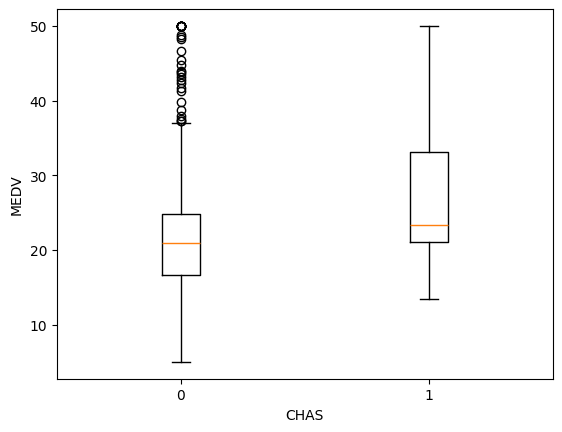

In [13]:
# alternative plot with matplotlib
dataForPlot = [list(housing_df[housing_df.CHAS==0].MEDV),
               list(housing_df[housing_df.CHAS==1].MEDV)]
fig, ax = plt.subplots()
ax.boxplot(dataForPlot)
ax.set_xticks([1, 2], minor=False)
ax.set_xticklabels([0, 1])
ax.set_xlabel('CHAS'); ax.set_ylabel('MEDV')
plt.show()

**Code cell outcome:** Side-by-side boxplots of NOX, LSTAT, PTRATIO, and INDUS split by CAT_MEDV to compare predictors for high- vs. low-value homes.

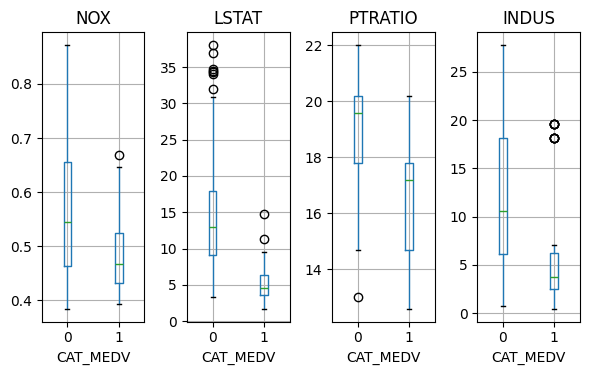

In [14]:
## side-by-side boxplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=[6, 4])
housing_df.boxplot(column='NOX', by='CAT_MEDV', ax=axes[0])
housing_df.boxplot(column='LSTAT', by='CAT_MEDV', ax=axes[1])
housing_df.boxplot(column='PTRATIO', by='CAT_MEDV', ax=axes[2])
housing_df.boxplot(column='INDUS', by='CAT_MEDV', ax=axes[3])
for ax in axes:
    ax.set_xlabel('CAT_MEDV')
plt.suptitle('')  # Suppress the overall title
plt.tight_layout()
plt.show()

**Code cell outcome:** Heatmap of correlations among Boston housing variables using seaborn (first without values, then with a divergent colormap).

<Axes: >

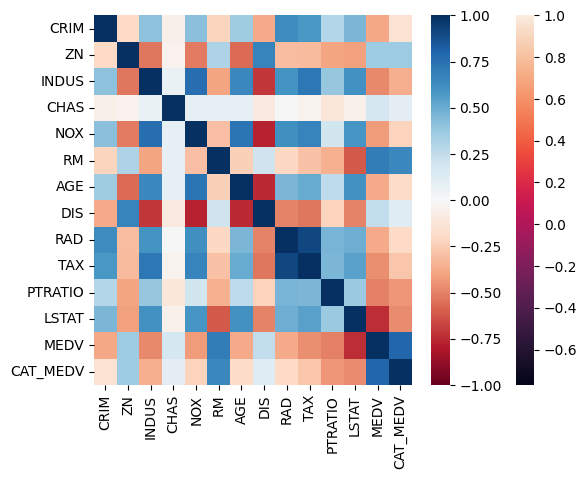

In [15]:
## simple heatmap of correlations (without values)
corr = housing_df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

# Change the colormap to a divergent scale and fix the range of the colormap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1,
            vmax=1, cmap="RdBu")

**Code cell outcome:** Correlation matrix heatmap with annotated correlation values.

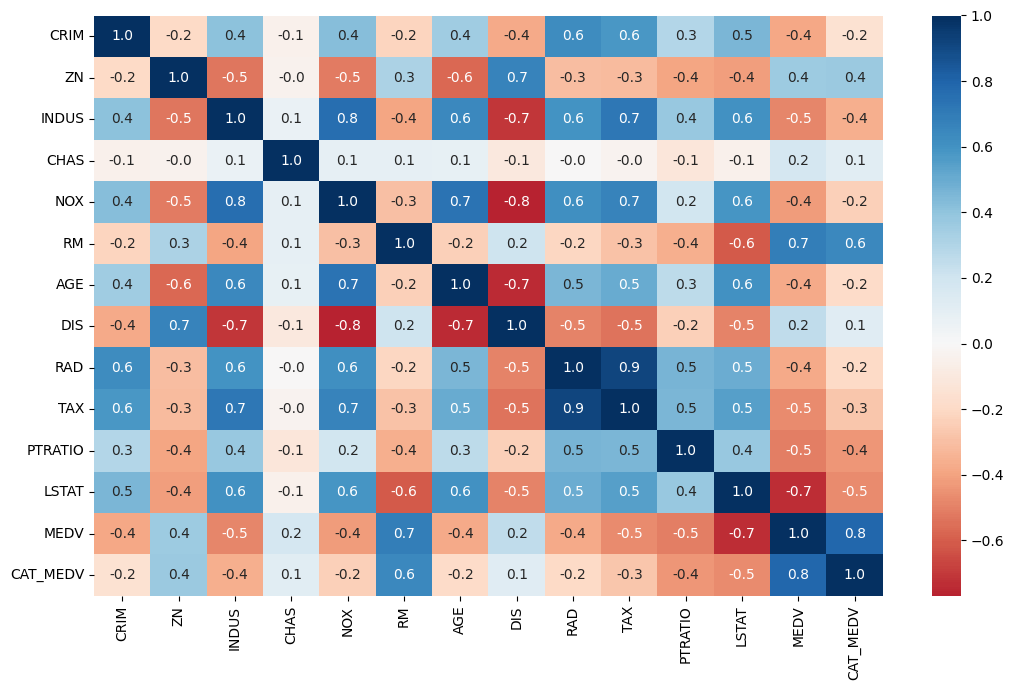

In [16]:
# Include information about values (example demonstrates how to control
# the size of the plot)
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)
plt.tight_layout()
plt.show()

**Code cell outcome:** Heatmap showing missing data patterns in the NYPD Motor Vehicle Collisions dataset (first 1000 rows).

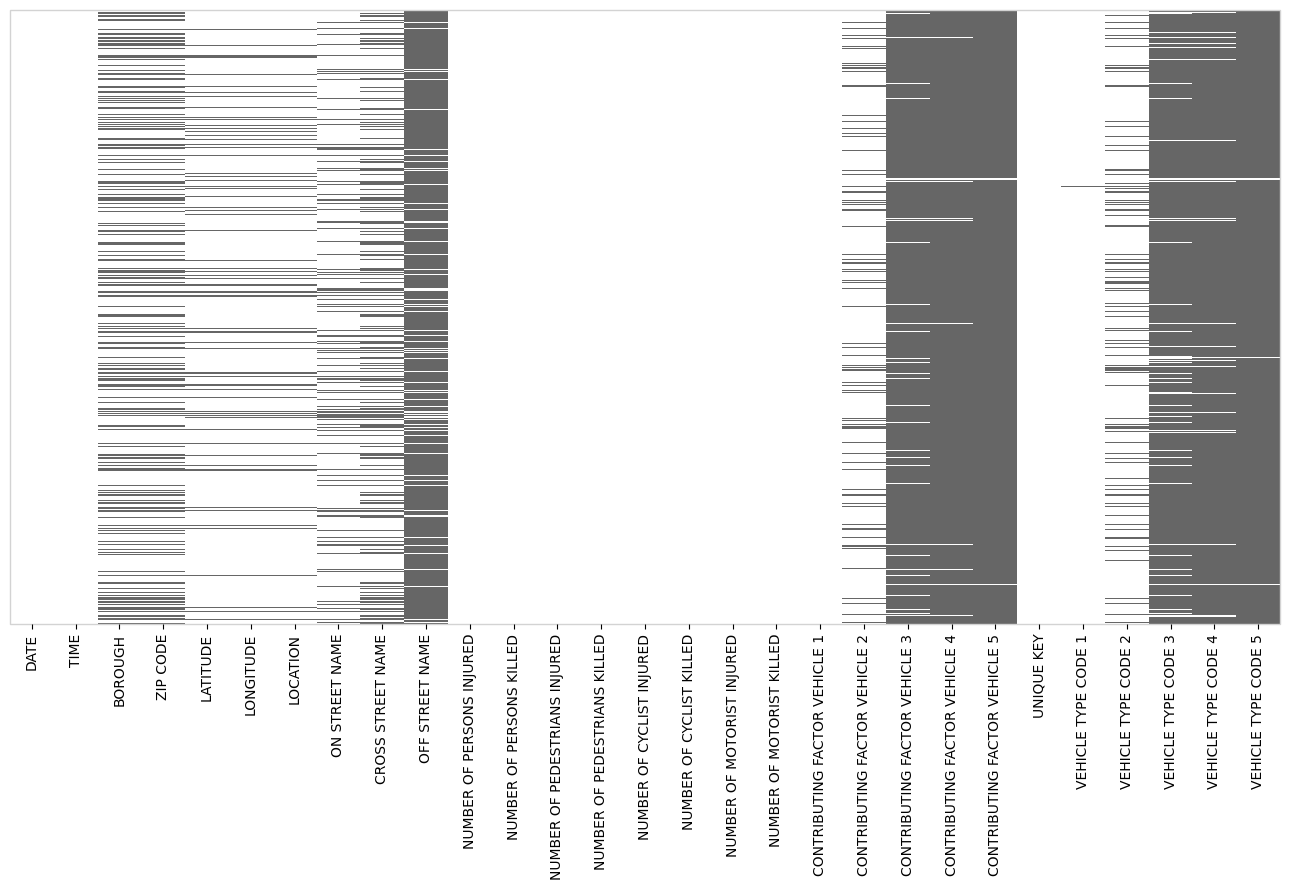

In [17]:
df = mlba.load_data('NYPD_Motor_Vehicle_Collisions_1000.csv').sort_values(['DATE'])

# given a dataframe df create a copy of the array that is 0 if a field contains a
# value and 1 for NaN
naInfo = np.zeros(df.shape)
naInfo[df.isna().to_numpy()] = 1
naInfo = pd.DataFrame(naInfo, columns=df.columns)

fig, ax = plt.subplots()
fig.set_size_inches(13, 9)
ax = sns.heatmap(naInfo, vmin=0, vmax=1, cmap=["white", "#666666"], cbar=False, ax=ax)
ax.set_yticks([])

# draw frame around figure
rect = plt.Rectangle((0, 0), naInfo.shape[1], naInfo.shape[0], linewidth=1,
                     edgecolor='lightgrey', facecolor='none')
rect = ax.add_patch(rect)
rect.set_clip_on(False)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Code cell outcome:** Scatter plot of LSTAT vs NOX with points colored by CAT_MEDV (high-value category).

<Axes: xlabel='LSTAT', ylabel='NOX'>

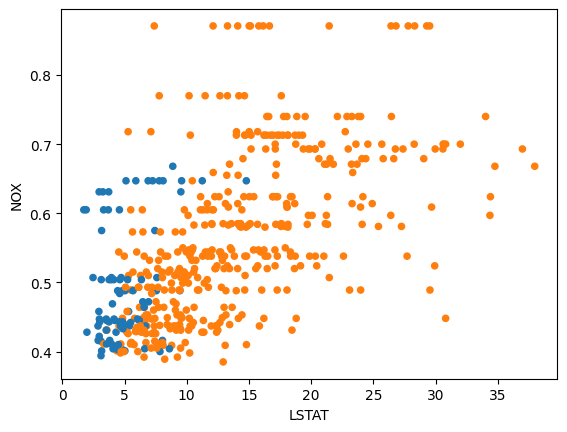

In [18]:
# Color the points by the value of CAT_MEDV
housing_df.plot.scatter(x='LSTAT', y='NOX',
                        c=['C0' if c == 1 else 'C1' for c in housing_df.CAT_MEDV])

**Code cell outcome:** Same scatter plot (LSTAT vs NOX) but with open circles and separate layers for each CAT_MEDV class, using matplotlib.

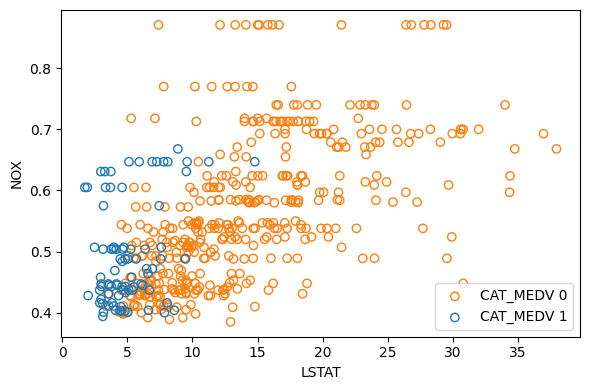

In [19]:
# Plot first the data points for CAT_MEDV of 0 and then of 1 (plot shown)
# Setting color to 'none' gives open circles
_, ax = plt.subplots(figsize=[6, 4])
for catValue, color in (0, 'C1'), (1, 'C0'):
    subset_df = housing_df[catValue == housing_df.CAT_MEDV]
    ax.scatter(subset_df.LSTAT, subset_df.NOX, color='none', edgecolor=color)
ax.set_xlabel('LSTAT')
ax.set_ylabel('NOX')
ax.legend(["CAT_MEDV 0", "CAT_MEDV 1"])
plt.tight_layout()
plt.show()

**Code cell outcome:** Panel bar charts showing average MEDV for each RAD category, separated by CHAS (0 and 1).

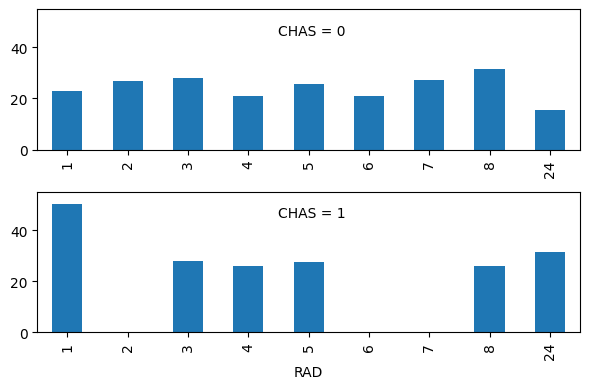

In [20]:
## panel plots
# compute mean MEDV per RAD and CHAS
dataForPlot_df = housing_df.groupby(['CHAS','RAD']).mean()['MEDV']
# We determine all possible RAD values to use as ticks
ticks = set(housing_df.RAD)
for i in range(2):
    for t in ticks.difference(dataForPlot_df[i].index):
        dataForPlot_df.loc[(i, t)] = 0
# reorder to rows, so that the index is sorted
dataForPlot_df = dataForPlot_df[sorted(dataForPlot_df.index)]

# Determine a common range for the y axis
yRange = [0, max(dataForPlot_df) * 1.1]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=[6, 4])
dataForPlot_df[0].plot.bar(x='RAD', ax=axes[0], ylim=yRange)
dataForPlot_df[1].plot.bar(x='RAD', ax=axes[1], ylim=yRange)
axes[0].annotate('CHAS = 0', xy=(3.5, 45))
axes[0].set_xlabel('')
axes[1].annotate('CHAS = 1', xy=(3.5, 45))
plt.tight_layout()
plt.show()

**Code cell outcome:** Scatter plot matrix for CRIM, INDUS, LSTAT, MEDV with density plots on the diagonal and correlation coefficients annotated.

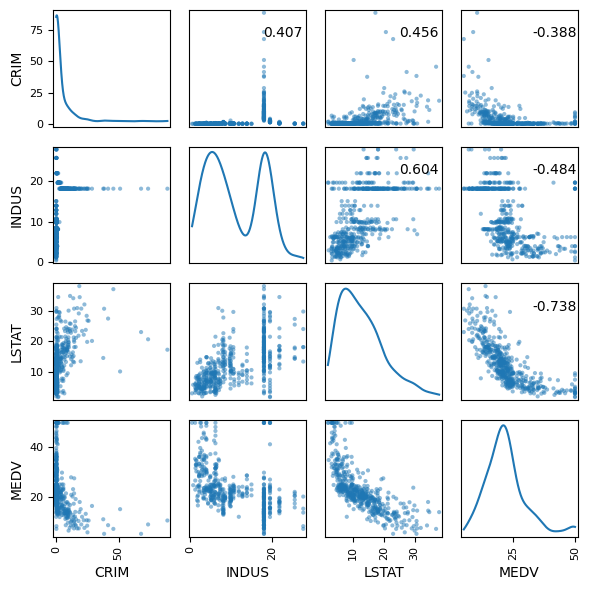

In [21]:
# Display scatterplots between the different variables
# The diagonal shows the distribution for each variable
df = housing_df[['CRIM', 'INDUS', 'LSTAT', 'MEDV']]
axes = scatter_matrix(df, alpha=0.5, figsize=(6, 6), diagonal='kde')
corr = df.corr()
for i, j in zip(*np.triu_indices(len(df.columns), 1), strict=True):
    axes[i, j].annotate(f'{corr.iloc[i,j]:.3f}', (0.8, 0.8),
                        xycoords='axes fraction', ha='center', va='center')
plt.tight_layout()
plt.show()

**Code cell outcome:** Side-by-side scatter plots of CRIM vs MEDV on regular and log-transformed axes.

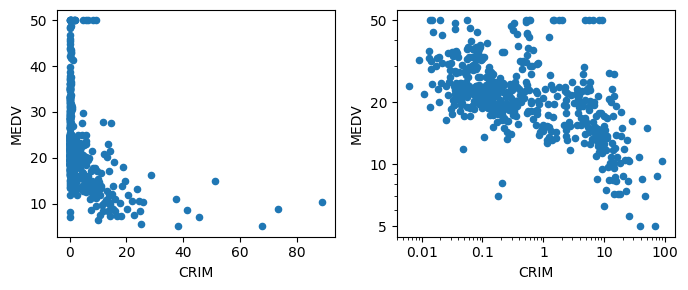

In [22]:
# Avoid the use of scientific notation for the log axis
plt.rcParams['axes.formatter.min_exponent'] = 4

## scatter plot: regular and log scale
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

# regular scale
housing_df.plot.scatter(x='CRIM', y='MEDV', ax=axes[0])
# log scale
ax = housing_df.plot.scatter(x='CRIM', y='MEDV', logx=True, logy=True, ax=axes[1])
ax.set_yticks([5, 10, 20, 50])
ax.set_yticklabels([5, 10, 20, 50])
plt.tight_layout()
plt.show()

**Code cell outcome:** Boxplots of CRIM split by CAT_MEDV on regular and log scale.

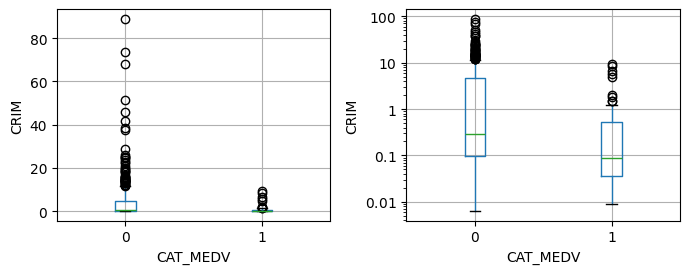

In [23]:
## boxplot: regular and log scale
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

# regular scale
ax = housing_df.boxplot(column='CRIM', by='CAT_MEDV', ax=axes[0])
# log scale
ax = housing_df.boxplot(column='CRIM', by='CAT_MEDV', ax=axes[1])
ax.set_yscale('log')

for ax in axes:
    ax.set_xlabel('CAT_MEDV')
    ax.set_ylabel('CRIM')
    ax.title.set_visible(False)
# suppress the title
axes[0].get_figure().suptitle('')
fig.suptitle('')
plt.tight_layout()
plt.show()

**Code cell outcome:** Four time series plots for Amtrak ridership: overall with quadratic fit, two-year zoom, monthly averages, and yearly averages.

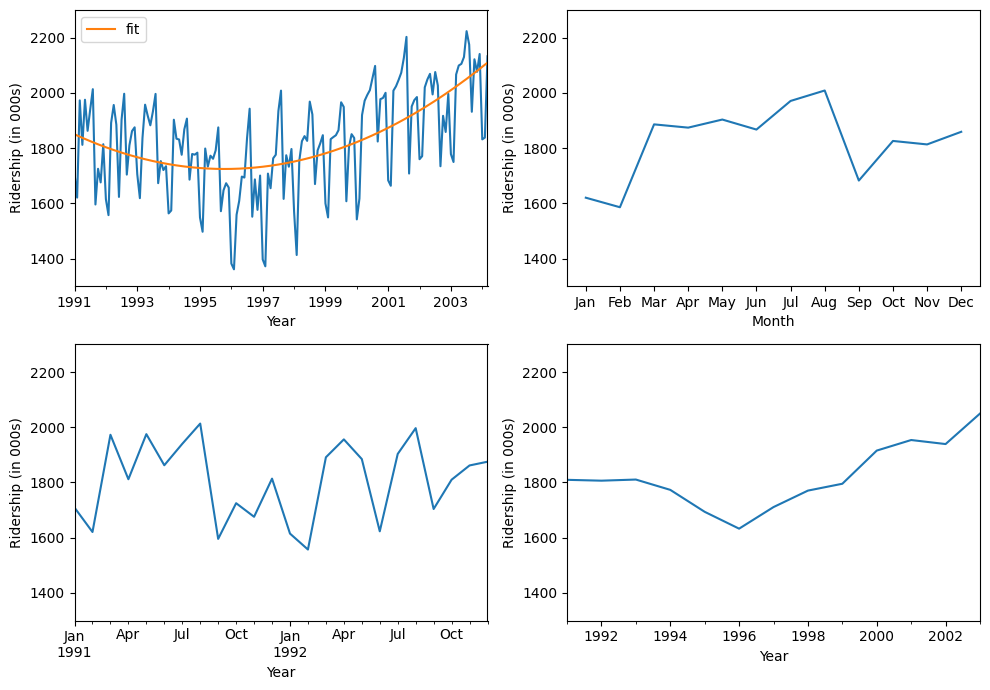

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))

Amtrak_df = mlba.load_data('Amtrak.csv')
Amtrak_df['Month'] = pd.to_datetime(Amtrak_df.Month, format='%d/%m/%Y')
Amtrak_df = Amtrak_df.set_index('Month')

# fit quadratic curve and display
quadraticFit = np.poly1d(np.polyfit(range(len(Amtrak_df)), Amtrak_df.Ridership, 2))
Amtrak_fit = pd.DataFrame({'fit': [quadraticFit(t) for t in range(len(Amtrak_df))]})
Amtrak_fit.index = Amtrak_df.index

ax = Amtrak_df.plot(ylim=[1300, 2300], legend=False, ax=axes[0][0])
Amtrak_fit.plot(ax=ax)
ax.set_xlabel('Year'); ax.set_ylabel('Ridership (in 000s)')  # set x and y-axis label

# Zoom in 2-year period 1/1/1991 to 12/1/1992
ridership_2yrs = Amtrak_df.loc['1991-01-01':'1992-12-01']
ax = ridership_2yrs.plot(ylim=[1300, 2300], legend=False, ax=axes[1][0])
ax.set_xlabel('Year'); ax.set_ylabel('Ridership (in 000s)')  # set x and y-axis label

# Average by month
byMonth = Amtrak_df.groupby(by=[Amtrak_df.index.month]).mean()
ax = byMonth.plot(ylim=[1300, 2300], legend=False, ax=axes[0][1])
ax.set_xlabel('Month'); ax.set_ylabel('Ridership (in 000s)')  # set x and y-axis label
yticks = [-2.0,-1.75,-1.5,-1.25,-1.0,-0.75,-0.5,-0.25,0.0]
ax.set_xticks(range(1, 13))
ax.set_xticklabels([calendar.month_abbr[i] for i in range(1, 13)])

# Average by year (exclude data from 2004)
byYear = Amtrak_df.loc['1991-01-01':'2003-12-01'].groupby(pd.Grouper(freq='YE')).mean()
ax = byYear.plot(ylim=[1300, 2300], legend=False, ax=axes[1][1])
ax.set_xlabel('Year'); ax.set_ylabel('Ridership (in 000s)')  # set x and y-axis label
plt.tight_layout()
plt.show()

**Code cell outcome:** Scatter plot of Sales vs Fuel_Cost for utilities companies, with company labels adjusted to avoid overlap.

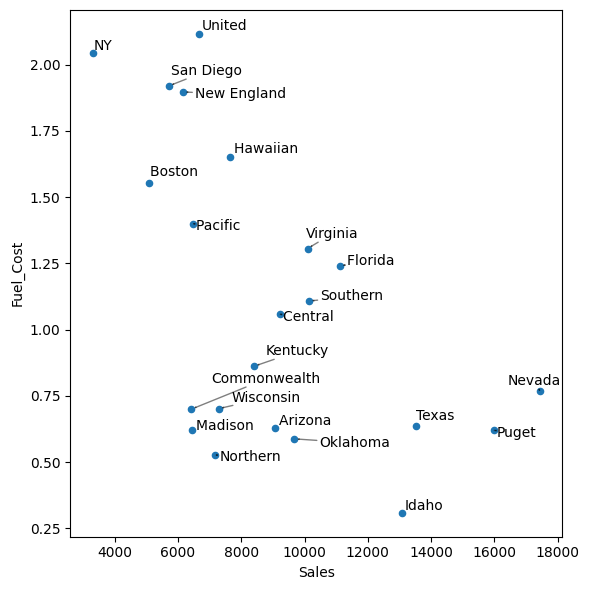

In [25]:
utilities_df = mlba.load_data('Utilities.csv')

ax = utilities_df.plot.scatter(x='Sales', y='Fuel_Cost', figsize=(6, 6))

# Add labels to the points using adjust_text to avoid overlap
texts = []
for _, row in utilities_df.iterrows():
    texts.append(ax.text(row.Sales, row.Fuel_Cost, row.Company))
adjust_text(texts, arrowprops={'arrowstyle': '-|>', 'alpha': 0.5})
plt.tight_layout()
plt.show()

**Code cell outcome:** Jittered scatter plot of Income vs CCAvg for Universal Bank customers, highlighting those who accepted a personal loan.

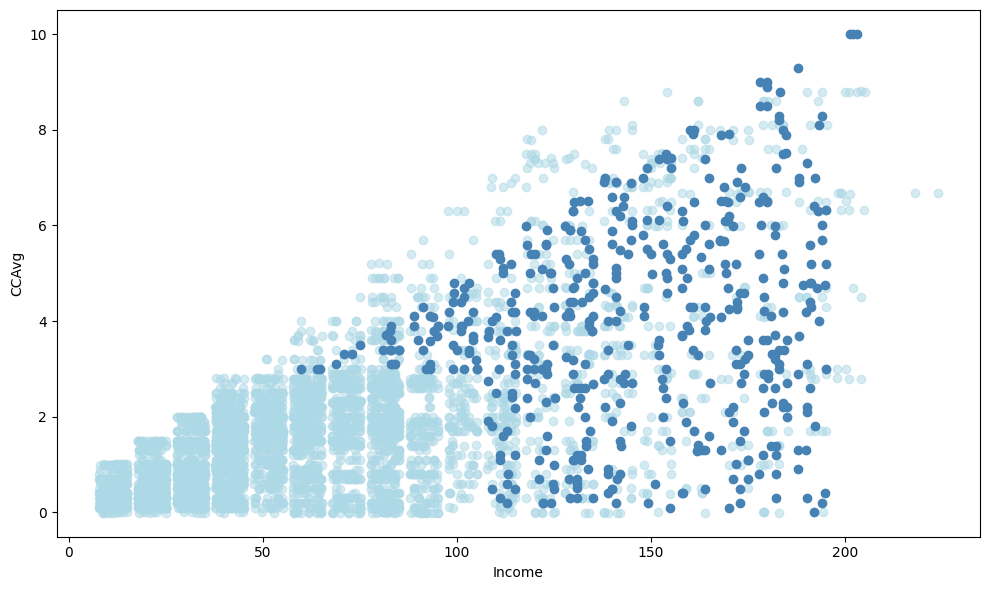

In [26]:
def jitter(x, factor=1):
    """ Add random jitter to x values """
    sx = np.array(sorted(x))
    delta = sx[1:] - sx[:-1]
    minDelta = min(d for d in delta if d > 0)
    a = factor * minDelta / 5
    return x + np.random.default_rng().uniform(-a, a, len(x))

universal_df = mlba.load_data('UniversalBank.csv')

saIdx = universal_df[universal_df['Personal Loan'] == 1].index

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(jitter(universal_df.drop(saIdx).Income),
            jitter(universal_df.drop(saIdx).CCAvg),
            marker='o', color='lightblue', alpha=0.5)
ax.scatter(jitter(universal_df.loc[saIdx].Income),
            jitter(universal_df.loc[saIdx].CCAvg),
            marker='o', color='steelblue')
ax.set_xlabel('Income')
ax.set_ylabel('CCAvg')
plt.tight_layout()
plt.show()

**Code cell outcome:** Parallel coordinates plot for Boston housing data, normalized, with separate panels for CAT_MEDV=0 and CAT_MEDV=1.

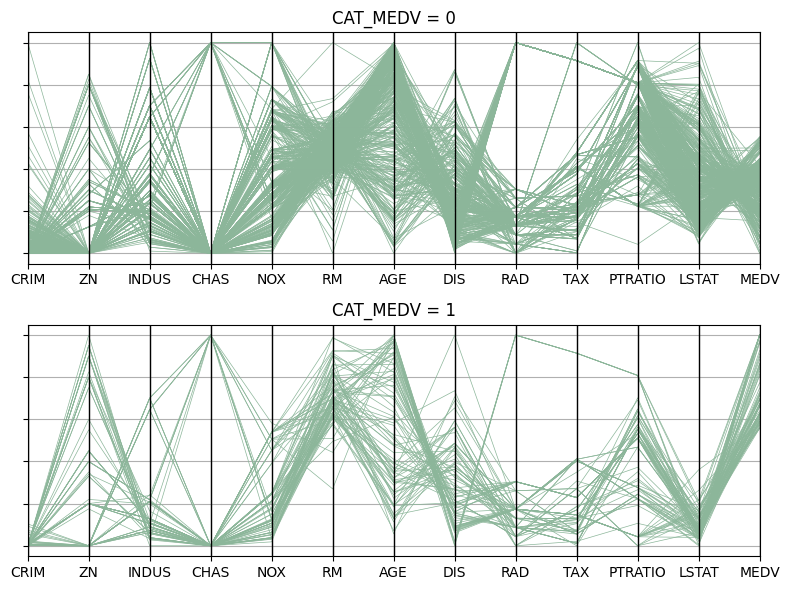

In [27]:
# Transform the axes, so that they all have the same range
min_max_scaler = preprocessing.MinMaxScaler()
dataToPlot = pd.DataFrame(min_max_scaler.fit_transform(housing_df),
                         columns=housing_df.columns)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=[8, 6])
for i in (0, 1):
    parallel_coordinates(dataToPlot.loc[i == dataToPlot.CAT_MEDV],
                         'CAT_MEDV', ax=axes[i], linewidth=0.5)
    axes[i].set_title(f'CAT_MEDV = {i}')
    axes[i].set_yticklabels([])
    axes[i].legend().set_visible(False)
plt.tight_layout()
plt.show()

**Code cell outcome:** Network graph of eBay sellers and bidders, showing connections between them.

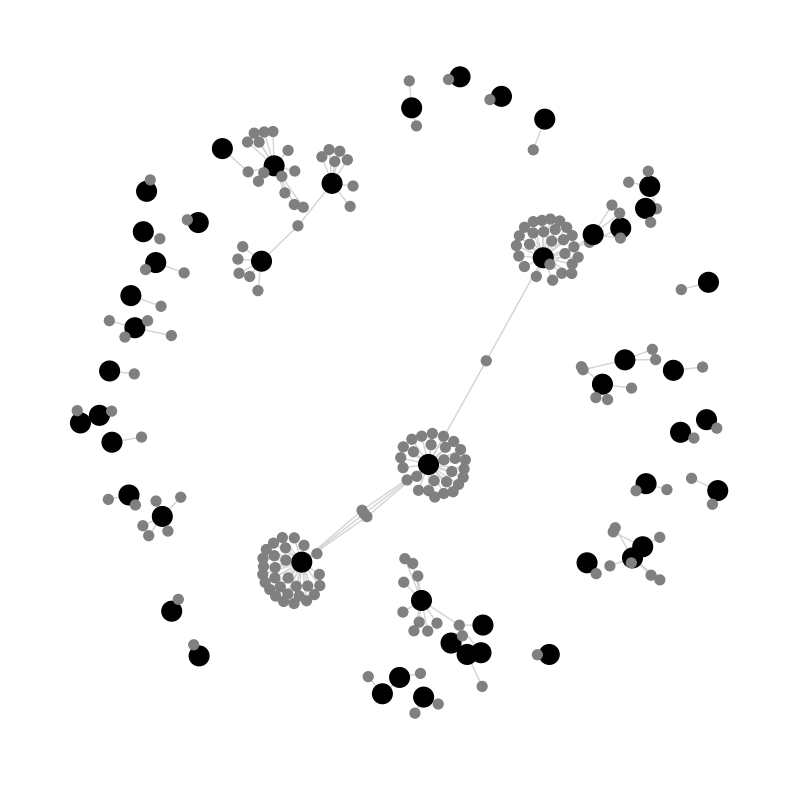

In [28]:
ebay_df = mlba.load_data('eBayNetwork.csv')

G = nx.from_pandas_edgelist(ebay_df, source='Seller', target='Bidder')

isBidder = [n in set(ebay_df.Bidder) for n in G.nodes()]
pos = nx.spring_layout(G, k=0.13, iterations=60, scale=0.5)
plt.figure(figsize=(10,10))
nx.draw_networkx(G, pos=pos, with_labels=False,
                 edge_color='lightgray',
                 node_color=['gray' if bidder else 'black' for bidder in isBidder],
                 node_size=[50 if bidder else 200 for bidder in isBidder])
plt.axis('off')
plt.show()

**Code cell outcome:** Interactive treemap of eBay auctions by category and brand, with average high bid and proportion of negative feedback.

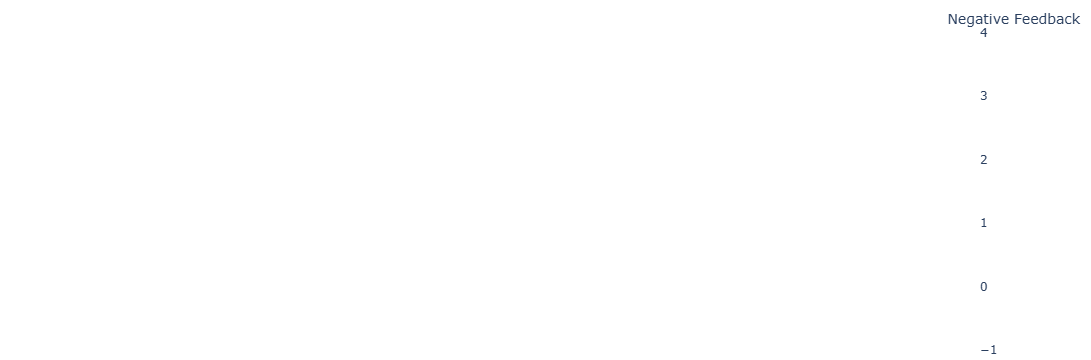

In [29]:
import plotly.express as px
ebayTreemap = mlba.load_data('EbayTreemap.csv')
ebayTreemap['Negative Feedback'] = [1 if feedback < 0 else 0
                                    for feedback in ebayTreemap['Seller Feedback']]

hierarchy = ['Category',  'Brand']
columns = [*hierarchy, 'High Bid', 'Negative Feedback']
averageBid = ebayTreemap[columns].groupby(hierarchy).mean().reset_index()

fig = px.treemap(averageBid, path=[px.Constant(''), *hierarchy],
                    values='High Bid', color='Negative Feedback',
                    color_continuous_scale=px.colors.sequential.Blues)
fig.update_layout(margin = {'t': 0, 'l': 0, 'r': 0, 'b': 0})
fig.show()

**Code cell outcome:** Interactive map showing GPS locations of students from the SC-US students dataset.

C:\Users\007\AppData\Local\Temp\ipykernel_9248\284600067.py:9: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



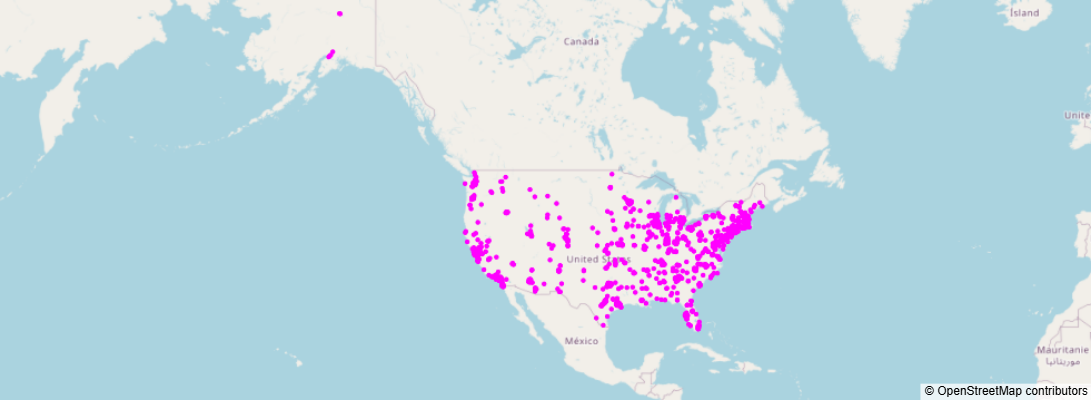

In [30]:
import plotly.express as px
SCstudents = mlba.load_data('SC-US-students-GPS-data-2016.csv')

center = {
    "lat": (SCstudents['latitude'].max() + SCstudents['latitude'].min()) / 2,
    "lon": (SCstudents['longitude'].max() + SCstudents['longitude'].min()) / 2,
}

fig = px.scatter_mapbox(SCstudents, lat="latitude", lon="longitude",
                        color_discrete_sequence=["fuchsia"], zoom=1.9, height=400,
                        center=center)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

**Code cell outcome:** Choropleth world map of happiness scores by country.

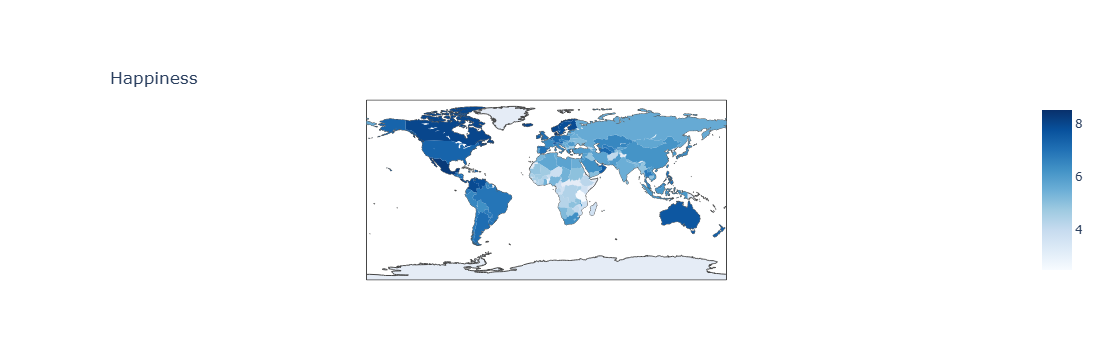

In [31]:
import plotly.graph_objects as go
happiness_df = mlba.load_data('Veerhoven.csv', na_filter=False)
fig_happiness = go.Figure().add_choropleth(
    z = happiness_df['Score'],
    locations = happiness_df["Nation"],
    locationmode='country names',
    colorscale = 'Blues',
    marker={'line': {'width': 0}},
).update_layout(
    title={'text':'Happiness', 'x':0.1, 'y': 0.8},
    width=700,
)
fig_happiness.show()

**Code cell outcome:** Choropleth world map of GDP (log-transformed) for 2015.

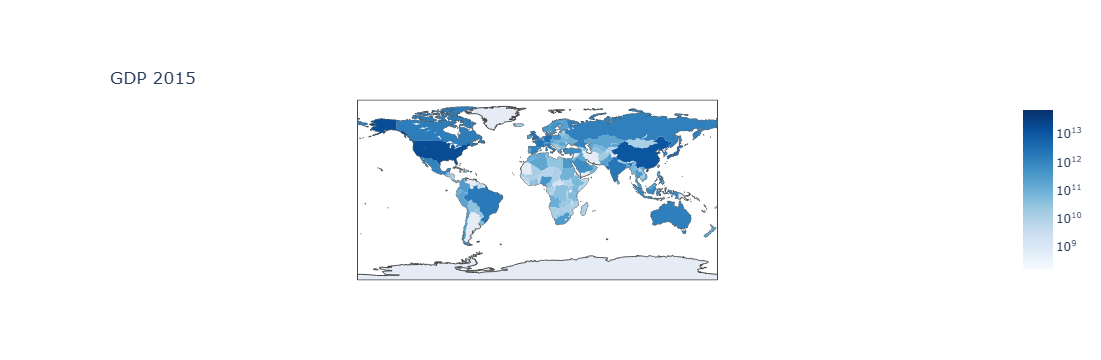

In [32]:
gdp_df = mlba.load_data('gdp.csv', skiprows=4)
fig_gdp2015 = go.Figure().add_choropleth(
    z = np.log10(gdp_df['2015']),
    locations = gdp_df["Country Code"],
    colorscale = 'Blues',
    colorbar = {
        'tickvals': list(range(14)),
        'ticktext': [f'10<sup>{f}</sup>' for f in range(14)],
    },
    marker={'line': {'width': 0}},
    legend = 'legend2',
)
fig_gdp2015.update_layout(
    title={'text':'GDP 2015', 'x':0.1, 'y': 0.8},
    width=700,
)
fig_gdp2015.show()